In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg

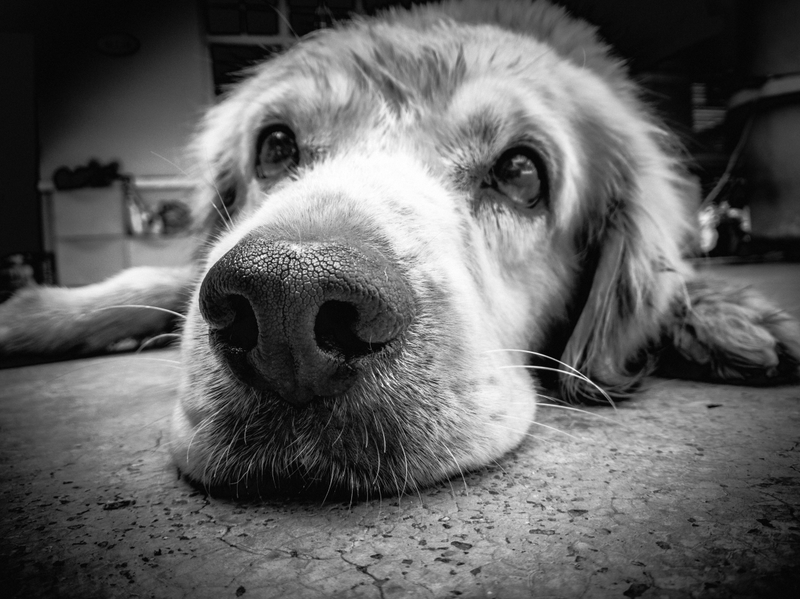

In [2]:
im = Image.open('dog.jpg').convert("L")
im

<div dir='rtl'style="text-align: right">
    تبدیل عکس به ماتریس 800*599

In [3]:
a = im.getdata()
a = np.array(a)
A = a.reshape(599,800)
A = A.T

<div dir='rtl'style="text-align: right">
محاسبه ماتریس $ A ^ tA $ و مقادیر ویژه و بردارهای ویژه آن و مقادیر منفرد $ A $

In [4]:
AtA = np.dot(A.T, A)
l, V = np.linalg.eig(AtA)
S = np.sqrt(l)
S = S.reshape(599)

<div dir='rtl'style="text-align: right">
    مقادیر ویژه $ A ^ tA $

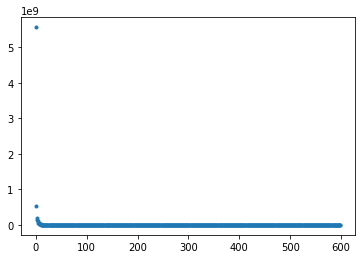

In [5]:
plt.plot(l,'.')

<div dir='rtl'style="text-align: right">
    مقادیر واحد $ A $:

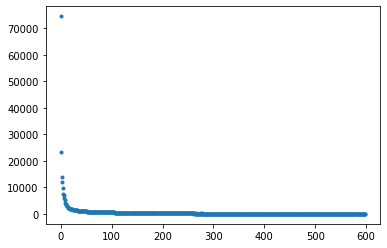

In [6]:
plt.plot(S,'.')

<div dir='rtl'style="text-align: right">
    محاسبه $ u_i $ 

In [7]:
U = np.dot(A, V) * (1/S)

<div dir='rtl'style="text-align: right">
    بازسازی تصویر از $ U، \ Sigma، V $

In [8]:
A2 = np.dot(np.dot(U, np.diag(S)), V.T)
A2 = A2.T

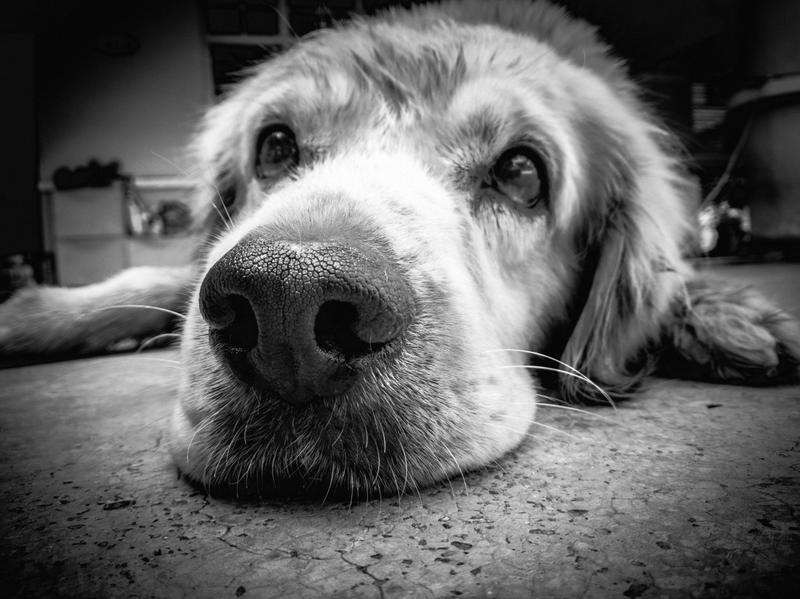

In [9]:
c = np.uint8(A2)
Image.fromarray(c)

<div dir='rtl'style="text-align: right">
    بازسازی تصویر با 10و50و100و150و200 مقدار منفرد

In [10]:
def reconstruct(i):
    A2 = np.dot(np.dot(U[:,:i], np.diag(S[:i])), V.T[:i])
    A2 = A2.T
    A2 = [[max(min(A2[i][j], 255),0) for j in range(800)]for i in range(599)]
    c = np.uint8(A2)
    return Image.fromarray(c)

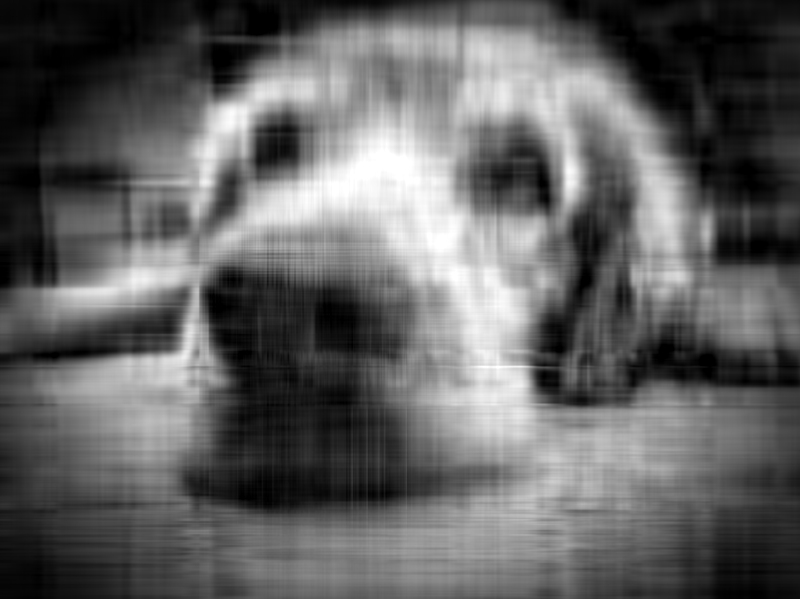

In [11]:
reconstruct(10)

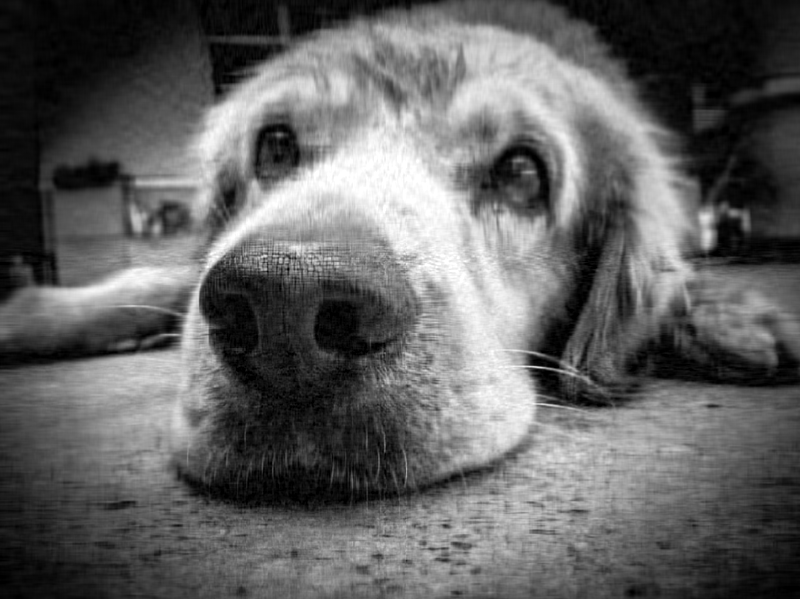

In [12]:
reconstruct(50)

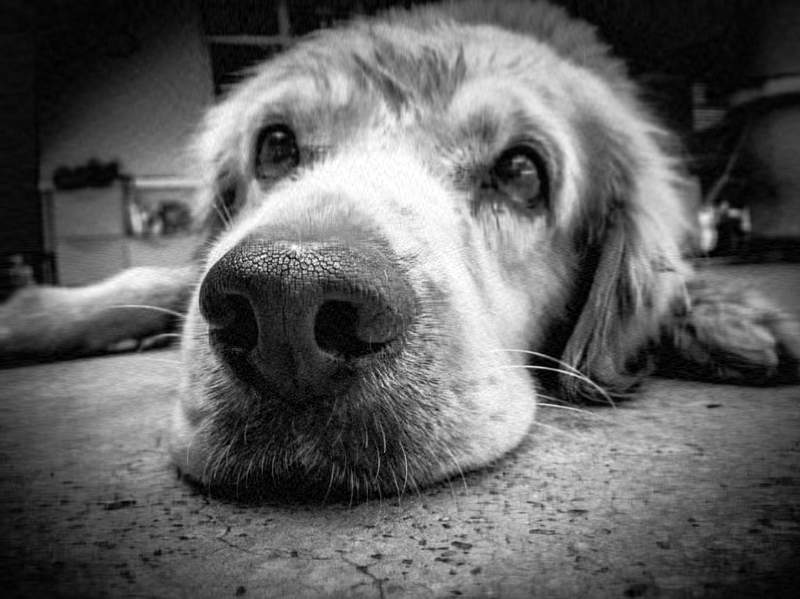

In [13]:
reconstruct(100)

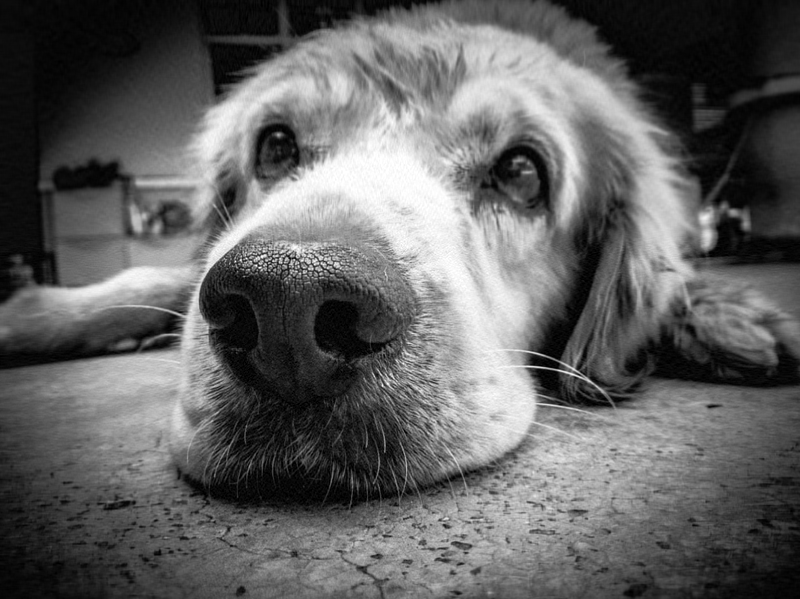

In [14]:
reconstruct(150)

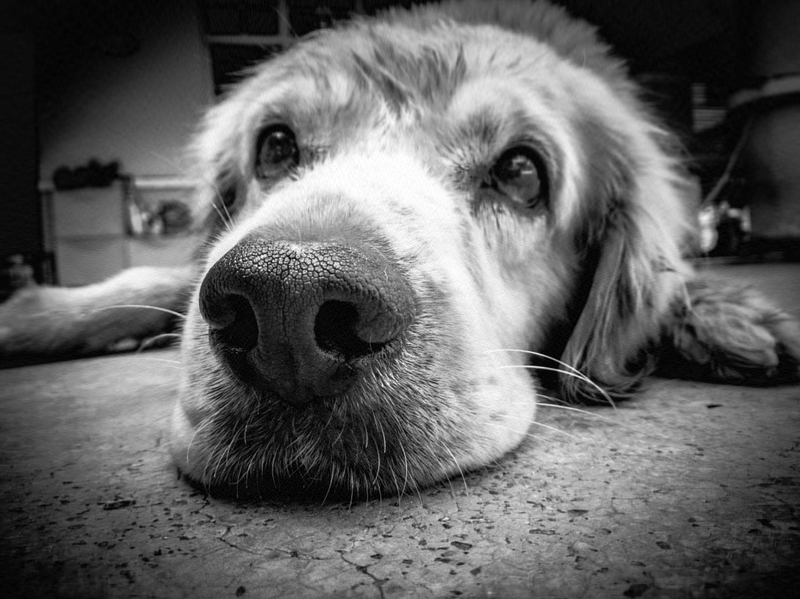

In [15]:
reconstruct(200)

<div dir='rtl'style="text-align: right">
می توانیم ببینیم که فقط با استفاده از 100 مقدار منفرد می توان تصویر اصلی را ساخت که چشم معمولی نمی تواند بین آنها تشخیص دهد. و کل مقادیری که باید برای آن نگه داریم $ (m + n + 1) P = (800 + 599 + 1) 100 = 140000 $ است که حدود 0.32 درصد از کل داده های تصویر است